In [5]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from cvxopt import matrix, solvers
from CommonFunction import plotSVM
from sklearn.utils import shuffle
from SVMFunction import PrimalSVM

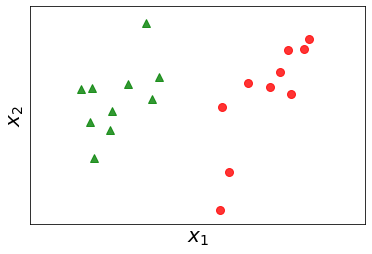

In [6]:
np.random.seed(22)
means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
Nsample = 10
X0 = np.random.multivariate_normal(means[0], cov, Nsample) # class 1
X1 = np.random.multivariate_normal(means[1], cov, Nsample) # class -1 

funcs = [
    lambda x: x[:, 0],
    lambda x: x[:, 1],
#    lambda x: np.multiply(x[:, 0], x[:, 1]),
#    lambda x: np.power(x[:, 0], 2),
#    lambda x: np.power(x[:, 1], 2),
#    lambda x: np.multiply(np.power(x[:, 0], 2), x[:, 1]),
#    lambda x: np.multiply(np.power(x[:, 1], 2), x[:, 0]),
#    lambda x: np.power(x[:, 0], 3),
#    lambda x: np.power(x[:, 1], 3),
#    lambda x: np.multiply(np.power(x[:, 0], 3), x[:, 1]),
#    lambda x: np.multiply(np.power(x[:, 1], 3), x[:, 0]),
#    lambda x: np.multiply(np.power(x[:, 0], 2), np.power(x[:, 1], 2)),
#    lambda x: np.power(x[:, 0], 4),
#    lambda x: np.power(x[:, 1], 4),
]
# plot points
plt.plot(X0[:, 0], X0[:, 1], 'g^', markersize = 8, alpha = .8)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)
plt.axis('equal')
# axis limits
plt.ylim(0, 3)
plt.xlim(2, 4)

# hide tikcs 
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)

plt.show()

In [1]:
X0 = np.random.multivariate_normal(means[0], cov, Nsample) # class 1
X1 = np.random.multivariate_normal(means[1], cov, Nsample) # class -1 

X = np.concatenate((X0, X1), axis = 0) # all data 
t = np.concatenate((np.ones((Nsample, 1)), -1*np.ones((Nsample, 1))), axis = 0) # labels 
X,t = shuffle(X, t)

svm = PrimalSVM(X, funcs, t).fit()
#svm.calculate(X,t)

NameError: name 'np' is not defined

[[3.60992639 2.03509743]
 [2.67924793 2.36893594]
 [3.96389821 3.08918682]]


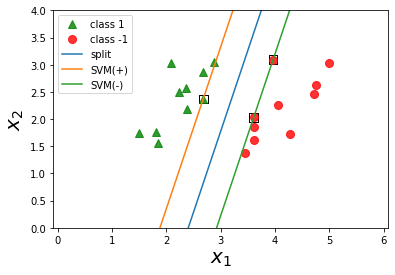

In [8]:
# plot points
plt.plot(X0[:, 0], X0[:, 1], 'g^', markersize = 8, alpha = .8, label = "class 1")
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8, label = "class -1")
plt.axis('equal')
# axis limits
plt.ylim(0, 4)
plt.xlim(2, 4)


plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)

w = svm.w.ravel()

a, b, c = w
slope = -a/b
offset = -c/b
            
w_xy = np.array([slope, offset]).reshape(-1, 1)
Xdraw = np.linspace(0, 4, 100).reshape(-1, 1)
Xdraw_ = np.hstack((Xdraw, np.ones(100).reshape(-1, 1)))
ydraw = Xdraw_.dot(w_xy)

plt.plot(Xdraw, ydraw, label = "split")

sv_points = svm.supportVectorPoints(X)
print(sv_points)
Xmark = sv_points[:, 0].ravel()
ymark = sv_points[:, 1].ravel()

plt.scatter(Xmark, ymark, marker = 's', s=80, facecolors='none', edgecolors='k')
        
plotSVM(svm).plotlineSVM()

plt.legend()
plt.show()